### Exploring BABIP with Statcast Data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sc = pd.read_csv('statcast_2017.csv')

In [3]:
sc.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,barrel
0,FF,2017-04-02,93.7,2.7324,6.3169,Randal Grichuk,545341,543557,single,hit_into_play_score,...,4-Seam Fastball,3,3,3,3,3,3,3,3,1.0
1,CU,2017-04-02,80.6,2.8152,6.3348,Randal Grichuk,545341,543557,NaN,ball,...,Curveball,3,3,3,3,3,3,3,3,NaN
2,CU,2017-04-02,77.9,2.9033,6.3019,Randal Grichuk,545341,543557,NaN,called_strike,...,Curveball,3,3,3,3,3,3,3,3,NaN
3,CU,2017-04-02,77.5,2.7517,6.2277,Kolten Wong,543939,543557,walk,blocked_ball,...,Curveball,3,3,3,3,3,3,3,3,NaN
4,FF,2017-04-02,93.1,2.8012,6.2854,Kolten Wong,543939,543557,NaN,foul,...,4-Seam Fastball,3,3,3,3,3,3,3,3,NaN


In [4]:
#Check columns

sc.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'pos2_person_id',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pos1_person_id',
 'pos2_person_id.1',
 'pos3_person_id',
 'pos4_person_id',
 'pos5_person_id',
 'pos6_person_id',
 'pos7_person_id',
 'pos8_person_id',
 'pos9_person_id',
 'release_p

### Filtering the data

Initially, just explore launch angle and exit velocity

In [5]:
sc = sc[['player_name','launch_speed','launch_angle','babip_value']]

In [6]:
sc.head()

,player_name,launch_speed,launch_angle,babip_value
0,Randal Grichuk,109.3,18.1,1.0
1,Randal Grichuk,NaN,NaN,NaN
2,Randal Grichuk,NaN,NaN,NaN
3,Kolten Wong,NaN,NaN,0.0
4,Kolten Wong,NaN,NaN,NaN


In [7]:
sc.dropna(inplace = True)

In [8]:
#Group by player

sc_player = sc.groupby('player_name').mean()

In [9]:
sc_player.head()

,launch_speed,launch_angle,babip_value
player_name,,,
A.J. Cole,77.050000,4.575910,0.200000
A.J. Ellis,84.075214,10.028061,0.205128
A.J. Jimenez,79.216667,20.925667,0.166667
A.J. Pollock,87.792373,8.339740,0.279661
A.J. Reed,84.100000,19.532800,0.000000


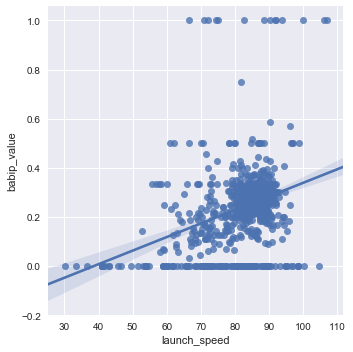

In [10]:
sns.lmplot('launch_speed', 'babip_value', data = sc_player)

I see that there are a number of players with BABIPs of 0 or 1, indicating very few balls in play. I'm going to check how many balls in play each player had, and filter out players with very few balls in play so that they don't skew the results. Right now the data still contains pitchers, for example. 

In [11]:
#Filter by >50 balls in play

sc_50 = sc.groupby('player_name').filter(lambda x: len(x) > 50)

In [12]:
sc_player = sc_50.groupby('player_name').mean()

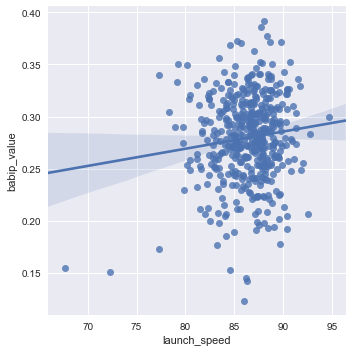

In [13]:
sns.lmplot('launch_speed', 'babip_value', data = sc_player)

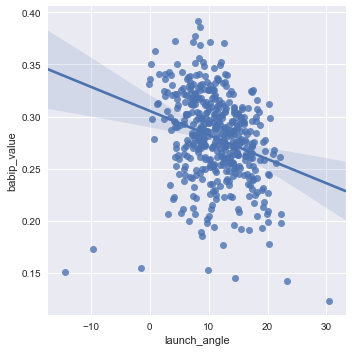

In [14]:
sns.lmplot('launch_angle', 'babip_value', data = sc_player)

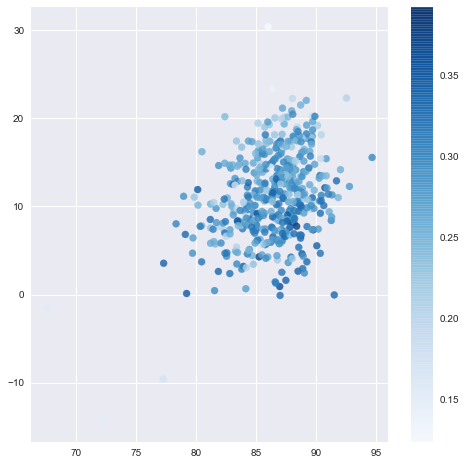

In [31]:
plt.figure(figsize=(8,8))
plt.scatter('launch_speed', 'launch_angle', data = sc_player, alpha = .8, c = 'babip_value', cmap = 'Blues')
cbar = plt.colorbar()